# Tasks for Machine Learning & Statistics Module

My submission for the solutions to the Tasks Assessment. The author is Seán Meade (G00376471@gmit.ie).

***

*Modules can't be used to complete the tasks but the following modules are used to explain certain parts and test our code.*

In [1]:
import matplotlib.pyplot as plt
import math

plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 100

**<ins>Task 1</ins>**:
>**October 5th, 2020**: Write a Python function called sqrt2 that calculates and
prints to the screen the square root of 2 to 100 decimal places. Your code should
not depend on any module from the standard library or otherwise. You should
research the task first and include references and a description of your algorithm.

#### Introduction

The square root of a real number $ S $, usually denoted as $ \sqrt{S} $, is a non-negative number that when multiplied by itself will give you $ S $. Algebraically, this means a procedure for finding the non-negative root of the equation $ f(x) = x^{2} - S $ when $ f(x) = 0 $ (i.e. $ x^{2} - S = 0 $). So starting off if we subtract $ S $ from both sides [1] we're given:

$$ x^{2} = S $$

because a sqaured number can't be negative $ S $ remains positive. Then by taking the square root of both sides (which is equivalent to putting something to the power of a half ($ x^{ \frac{ 1 }{ 2 } } $) we are left with the square root of $ S $:

$$ x = \sqrt{S} \;\; or \;\; x = S^{ \frac{ 1 }{ 2 } } $$

This is the representation of the square root ($ x $) of a number ($ S $). Where, like we said above, when $ x $ is squared (or multiplied by itself) it produces $ S $.

Every real number has two square roots. The square root we're interested in is the principal irrational number (not expressible as a ratio of two integers). Due to the fact that it's an irrational number only an approximation of the square root can be calulated. It is important to note that even with a perfect square (for example $ 2 = \sqrt{4} $) the different methods for calulating the square root may only return an approximation [1].

#### Method

There are many ways to calculate the square root of a number (or at least the approximation). In this exercise we will use Newton's method, the most suited for programmatic calculation[1]. 

Newtons method is actually a procedure used for solving equations of the form $ f(x) = 0 $. Which is perfect for us because we want to find x when $ f(x) = 0 $ where in our instance $ f(x) = x^{2} - S $.

It works as follows: 
First we need a guess of the square root of the real number in question. In math talk it means we need a guess of $ x $ to start with. Preferably it should be as close to $ S $ as we can determine. We call this guess $ x_{n} $ and we use this along with Newton's method to find a closer approximation of the square root of $ S $, $ x_{ n + 1 } $ [2]. 

Let's say our $ S $ is 100. We know that the square root, $ x $, is 10, but what if we didn't? Say we guessed the square root as 33. This 33 is now our $ x_{ n } $. If we were to plot this in terms $ x $ vs. $ S $ our $ x $ and $ y $ coordinates would be (33, 33<sup>2</sup>). Which is (33, 1,089). This clearly is the wrong answer but our concern is with getting a more accurate guess of $ x $.

We can show (using matplotlib) the equation of the line $ S = x^{ 2 } $ where $ 0 < x \leq \frac{S * 4}{10} $ (shown as the blue line below) along with where our guess is on this line (the red dot). 

<img src="imgs/Svsx.png" width="700">

We can see from the above graph that our guess was way off. The x-axis represents the number we want to square ($ x $) and the y-axis represents the square of that number ($ S $). From the graph we can see that the square of our guess 33 is close to 1,000 (it's actually 1,089). This is where Newton's method comes into its own. The green line extends out from where the 100 mark is. Where the green line intercepts the blue curve is where our square root lies. You'll see if you change the value of our guess (in math terms $ x_{ n } $ and in our code above `x_n`) our red indecator will get closer or further from this intercept the closer or further you get from the correct guess of 10.

This is exacly what Newton's method does. It starts with a guess and using the method, that we will look at below, gets closer and closer to this intercept (but never actually touches it, hence the approximation of the square root).

So how do we find the next (hopefully closer) approximation. Newton's method uses this starting point, $ x_{ n } $ (where $ x_{ n } > 0 $), and gets the tangent line (the red line above) to the function $ f(x) = x^{ 2 } - S ($ when $ f(x) = 0 $) and where this line cuts the x-axis is where is our new approximation $ x_{ n + 1 } $ is[2]. Using this new approximation we can see that we are closer from our first guess but still too far to consider accurate.

The equation of this tangent line is:

$$ y = f(x_n) + f'(x_n)(x - x_n) $$

Where:

$$ f'(x) = 2x $$

Doing the next iteration means that $ x_n = x $ and $ n_{ n + 1 } = x_n $. We're looking for $ n_{ n + 1 } $ for where this line crosses the x-axis, meaning $ y = 0 $:

$$ 0 = f(x_{ n + 1 }) + f'(x_{ n + 1 })(x_n - x_{ n + 1 }) $$

Rearanging we can represent $ x_{ n + 1 } $ as:

$$ x_{ n + 1 } = x_n - \frac{ f(x_n) }{ f'(x_n) } $$

So by filling in what we know for the square root the equation then becomes:

$$ x_{ n + 1 } = x_n - \frac{ x_{ n }^2 - S }{ 2x_n } $$

Simplifying:

$$ x_{ n + 1 } = \frac{ 1 }{ 2 } \left( x_n + \frac{ S }{ x_n }\right) $$

This is the equation that we will use to calculate $ x $. First lets prove that as $ x_n $ approaches $ x $ it remains a real number because we're only interested in real numbers of x. A real number is a positive number that can be represented on a line. For this it needs to be positive and quantifiable. We know our initial guess of $ x_n $ is positive and real. There are three conditions for our $ x_n $. The frist is that $ x_{ n }^2 > S $ meaning our initial guess was higher then $ x $. The second is that it is lower then our guess, $ x_{ n }^2 < S $. Finally that our guess is exactly right, $ x_{ n }^2 = S $ (i.e. that $ x_n = x $). We'll do this by trying to calculate the difference between one iteration and the previous ($ x_{ n + 1 } - x_n $). We do this by subtracting both sides of the previous equation by $ x_n $:

$$ x_{ n + 1 } - x_n = \frac{ 1 }{ 2 } \left( x_n + \frac{ S }{ x_n }\right) - x_n $$

Simplifying and finding the common denominator of the RHS:

$$ x_{ n + 1 } - x_n = \frac{ x_n }{ 2 } + \frac{ S }{ 2 x_n } - \frac{ x_n }{ 1 } $$

$$ x_{ n + 1 } - x_n = \frac{ x_{ n }^2 + S - 2x_{ n }^2 }{ 2x_n } $$

$$ x_{ n + 1 } - x_n = \frac{ S - x_{ n }^2 }{ 2x_n } $$

$$ x_{ n + 1 } - x_n = \frac{ 1 }{ 2x_n } \left( S - x_{ n }^2 \right) $$


So for $ x_{ n }^2 > S $ we know that $ S - x_{ n }^2 $ is negative and approaching zero. In turn this means that $ x_{ n + 1 } - x_n $ (the error in our approximation between $ x_n $ and $ x_{ n + 1 } $) is negative and approaching zero. This tells us that each iteration is less then the one before and we know that it is approaching $ x $. Our initial guess, $ x_0 $ and the square root we're trying to calculate ($ x $) are both positive. From this we can infer that $ x_n \leq x_{ n + 1 } \leq x_{ n + 2 } \leq ... x $ meaning that $ x_n $ does infact stay positive as it approaches $ x $. The same can be infered from $ x_{ n }^2 < S $. Where $ x_n \geq x_{ n + 1 } \geq x_{ n + 2 } \geq ... x $. 

We can use the last equation to calculate the error between each iteration [4]:

<p style="text-align: center;">x_n1 - x_n = (1 / (2 * x_n) ) * (S - x_n**2)</p>

For $ x_{ n }^2 = S $ we'll rearrange the last equation to represent $ S - x_{ n }^2 $ this will give us the error of our approximation in relation to the number under investigation ($ S $):

$$ S - x_{ n }^2 = 2x_{ n }( x_{ n + 1 } - x_n) $$

Since $ x^2 = S $ the LHS becomes zero as $ x_{ n + 1 } - x_n \to 0 $ (or as the error in our approximation between $ x_n $ and $ x_{ n + 1 } $ approaches zero) as $ n \to \infty $ we get closer to x which is a positive real number.

Now on to using the equation from before:

$$ x_{ n + 1 } = \frac{ 1 }{ 2 } \left( x_n + \frac{ S }{ x_n }\right) $$

Or represented as Python code:

<p style="text-align: center;">x_n1 = 0.5 * (x_n + S/x_n)</p>

In the example below I show the first five iterations of Newton's Method. Where $ S $ is 2 and our initial guess $ x_0 $ is $ S/2 $.

In [2]:
# Find the square root of S
S = 2 # square root = 10

x_0 = S/2

x_n = 0.5 * (x_0 + S/x_0)
print("The first guess of x is {}".format(x_n))

for i in range(0, 5):
    x_n = 0.5 * (x_n + S/x_n)
    error = (1 / (2 * x_n) ) * (S - x_n**2)
    print("The next approximation of x is {} and the reduction in error from previous is {}".format(x_n, error))

The first guess of x is 1.5
The next approximation of x is 1.4166666666666665 and the reduction in error from previous is -0.002450980392156776
The next approximation of x is 1.4142156862745097 and the reduction in error from previous is -2.1238998197836126e-06
The next approximation of x is 1.4142135623746899 and the reduction in error from previous is -1.5947429102833119e-12
The next approximation of x is 1.414213562373095 and the reduction in error from previous is 1.5700924586837752e-16
The next approximation of x is 1.414213562373095 and the reduction in error from previous is 1.5700924586837752e-16


You'll notice that for the last two iterations both the approximation of the square root of two and the error between iterations is the same. This is due to the limitation of computers representing floating-point numbers. They do this by using approximate binary fraction (we will discuss this in more detail below). 

The purpose of this task is to create a function that finds the square root of two to an accuracy of 100 decimal places. So in this case our $ S $ is 2 and our initial guess $ x_n $ must lie between $ 0 $ and $ S $ so we'll take it as $ S/2 $ (or 1). 

In [3]:
def sqrt2(full_print=False):
    
    S = 2
    
    # Our initial guess of x which is halfway between 0 and S
    x_n = S/2
    
    while (abs(S - (x_n**2)) > 0.1*10**-14):
        x_n = 0.5 * (x_n + S/x_n)
        # Uncomment for error
        # error = (1 / (2 * x_n) ) * (S - x_n**2)
    
    if(full_print==True):
        print(format(x_n, ".100f"))
    
    return x_n

sqrt2(True)

1.4142135623730949234300169337075203657150268554687500000000000000000000000000000000000000000000000000


1.414213562373095

Below is the square root of two to an accuracy of 100 decimal places [5].Watch what happens when we try to print this.

In [4]:
x = 1.41421356237309504880168872420969807856967187537694807317667973799073247846210703885038753432764157273501
print(x)

1.4142135623730951


Also lets see what happens when we try to print it to 100 decimal places.

In [5]:
format(x, ".100f")

'1.4142135623730951454746218587388284504413604736328125000000000000000000000000000000000000000000000000'

Lastly lets take this output and take it from the exact value:

In [6]:
y = 1.4142135623730951454746218587388284504413604736328125

x - y

0.0

This is not what is expected and at first glance looks like we have done something wrong. In fact it is (as I mentioned above) the error that occurs when a computer (that works in 1s and 0s) trys to represent a base ten floating point number. As explained in the official Python documentation [6] languages use an approximation of certain numbers, for Python it's generally to 15 decimal places. Their examples are quiet suficient in explaining this so I will use them here.

Floating point numbers are represented in computer hardware as base 2 (binary) fractions. For example 0.125 can be represented in base 10 as follows:

0.125 = 1/10 + 2/100 + 5/1000

In the same way the binary fraction is:

0.001 = 0/2 + 0/4 + 1/8

In [7]:
base10 = 1/10 + 2/100 + 5/1000
base2  = 1/8  +  0/4  + 0/2 # or 0100 in binary

print("Base 10: ", base10)
print("Base 2 : ", base2 )

Base 10:  0.125
Base 2 :  0.125


Most decimal fractions however can only be represented as an approximation in binary fractions. Take 1/3 for example. When approximated to a base ten fraction it can be represented as `0.3` or better still `0.33` and you can keep going adding the next decimal place of 3 but never reach an exact value for 1/3.

Similarly, using binary (or base 2) digits to represent 0.1 (or 1/10) will leave you with an infinitely repeating fraction

0.0001100110011001100110011001100110011001100110011...

which means you can only ever represent it as an approximation in binary form.

Binary fractions are a real number as the numerator as a real number and the denominator as a power of 2. In the case of 1/10:

In [8]:
# Get 1/10 as a fraction: 3602879701896397 / 36028797018963968
numerator, denominator = (1/10).as_integer_ratio()
# Work out what power of two the denominator is: 55 [7]
power_of_2 = math.log2(denominator)
# Print our numerator divided by two to the power of 55
numerator/2**power_of_2

0.1

The above shows 1/10 being represented as a fraction (`.as_integer_ratio()`). Next we use that fraction to find the denominator in terms of a power of 2 (`math.log2`). Look what happens when we represent it with 20 decimal places.

In [9]:
format((numerator/2**power_of_2), ".20f")

'0.10000000000000000555'

Our approximation is exposed.

Further examination can be done with an alteration on our newton method code above. We do this by splitting the input and the output into equivalent numerators and denominators. We can see that between iteration number 6 and 8 the n/d ratio is significantly larger but the output of n/d to twenty decimal places (and in fact as mant as you like) are the same because they are both approximated by the same binary fraction [definietly a reference here].

In [10]:
n = 1
d = 1

for i in range(2, 9):
    a = n
    b = d
    for j in range(0,1):
        n = a**2 + 2 * (b**2)
        d = 2*a*b
        if i % 2 == 0 and i > 4:
            print("iteration no.", i)
            print("numerator (n):", n)
            print("denominator (d):",d)
            print("n/d:", format(n/d, ".20f"))
            print("")

iteration no. 6
numerator (n): 886731088897
denominator (d): 627013566048
n/d: 1.41421356237309514547

iteration no. 8
numerator (n): 4946041176255201878775086487573351061418968498177
denominator (d): 3497379255757941172020851852070562919437964212608
n/d: 1.41421356237309514547



#### Testing our function

At first glance the output of our function and the imported one from the math module look almost identical.

In [11]:
imported_sqrt_of_2 = math.sqrt(2)
created_sqrt_of_2 = sqrt2()

print("The square root of 2 by math.sqrt():", imported_sqrt_of_2)
print("The square root of 2 by sqrt2()    :", created_sqrt_of_2)

The square root of 2 by math.sqrt(): 1.4142135623730951
The square root of 2 by sqrt2()    : 1.414213562373095


But again on closer inspection they are much different. Here are the same outputs viewed to 30 decimal places.

In [12]:
print("The square root of 2 by math.sqrt():", format(imported_sqrt_of_2, ".30f"))
print("The square root of 2 by sqrt2()    :", format(created_sqrt_of_2, ".30f"))

The square root of 2 by math.sqrt(): 1.414213562373095145474621858739
The square root of 2 by sqrt2()    : 1.414213562373094923430016933708


The error between these outputs squared and 2 will obviously be different but the difference is interesting.

In [13]:
error_of_imported = 2 - (imported_sqrt_of_2**2)
error_of_created = 2 - (created_sqrt_of_2**2)

print("Error of math.sqrt():", error_of_imported)
print("Error of sqrt2()    :", error_of_created)

Error of math.sqrt(): -4.440892098500626e-16
Error of sqrt2()    : 4.440892098500626e-16


They are equal but opposite (I haven't researched why this is yet, but it's interesting none the less).

We can see from converting these into integer ratios (or the numerator and denominator equivalents) that they are different. For bellow:

- `n = numerator`
- `d = denominator`

In [14]:
print("n and d for math.sqrt()",(imported_sqrt_of_2).as_integer_ratio()) 
print("n and d for sqrt2()    " ,(created_sqrt_of_2).as_integer_ratio())

n and d for math.sqrt() (6369051672525773, 4503599627370496)
n and d for sqrt2()     (1592262918131443, 1125899906842624)


Then squaring both the difference becomes obvious.

In [15]:
imported_sqrt_of_2**2, created_sqrt_of_2**2

(2.0000000000000004, 1.9999999999999996)

## Time to start bitwise

[1] https://en.wikipedia.org/wiki/Methods_of_computing_square_roots

[2] https://www.math.upenn.edu/~kazdan/202F09/sqrt.pdf

[3] https://math.mit.edu/~stevenj/18.335/newton-sqrt.pdf

[4] https://stackoverflow.com/questions/8505385/finding-square-root-of-2-upto-more-than-100-decimal-places

[5] https://apod.nasa.gov/htmltest/gifcity/sqrt2.10mil

[6] https://docs.python.org/3/tutorial/floatingpoint.html

[7] https://www.geeksforgeeks.org/program-to-find-whether-a-no-is-power-of-two/

[]https://www.w3schools.com/python/ref_func_round.asp (for rounding number)
[] https://kodify.net/python/math/round-integers/ (for how to use round to get whole number)
[] https://stackoverflow.com/questions/41383787/round-down-to-2-decimal-in-python; from MSeifert (for getting more accurate floating point numbers)
[] https://docs.python.org/3/tutorial/floatingpoint.html (to explain floating point point numbers)

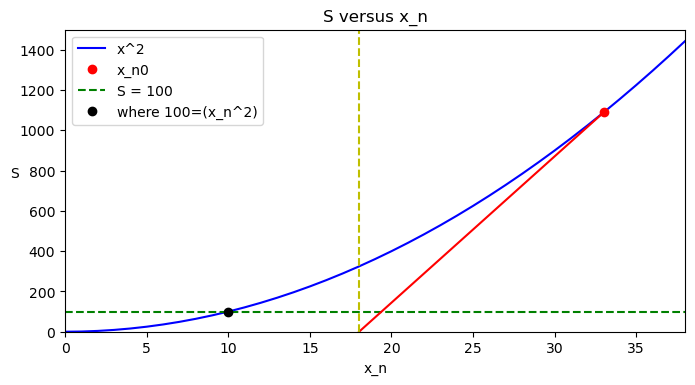

In [19]:
# S
S = 100

# Our first guess of x
x_n = [33]
# The accurate value of x for S = 100
x = [10]

# x values for mapping S = x^2
xs = range(0, int(S * 0.4))

# function to caluate a list of S values using xs
def calculateS(xs):
    Slist = []
    
    for i in range(0, len(xs)):
        Slist.append((xs[i])**2)
        
    return Slist

# S values for mapping S = x^2
Slist = calculateS(xs)

# calculate the new value of x_n where f(x)=0, and x_n=33
# This is the equation of the tangent to the curve 
x_n1 = 0.5*(x_n[0] + S/x_n[0])

# caluate the S for our guess 33 (this is 33^2)
y_n = calculateS(x_n)
# caluate the S for correct answer of 10 (this is 10^2)
y = calculateS(x)

# points to create green line to show where our correct answer cuts the curve
Sx = [S] * int(S * 0.4)

# blue line indicating S = x^2
plt.plot(xs, Slist, 'b-', label="x^2")
# red dot that shows where our guess of x_n of 33 lands on curve
plt.plot(x_n, y_n, 'ro', label="x_n0")
# green line showing where S = 100 cuts the curve
plt.plot(xs, Sx, 'g--', label="S = 100")
# black dot that shows where the green line cuts the curve and 100=x^2 (where x = 10)
plt.plot(x, y, 'ko', label="where 100=(x_n^2)")
# red line showing the tangent line to the curve at the point of our first guess
plt.plot([x_n1, x_n[0]], [0, y_n[0]], 'r-')
# yellow line up from where our tangent line cuts the x-axis for our next approximation of x
plt.axvline(x=x_n1, ymin=0, ymax=1, c='y', linestyle='--')

# Title
plt.title("S versus x_n")
# x label
plt.xlabel("x_n")
# y label
plt.ylabel("S", rotation=0)

# removing white space
plt.xlim(xmin=0, xmax=38)
plt.ylim(ymin=0, ymax=1500)

# produce legend
plt.legend()

plt.show()